In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [32]:
#input 
kepadatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kepadatan')
waktu = ctrl.Antecedent(np.arange(0, 25, 1), 'waktu')

In [33]:
#output
durasi_lampu_hijau = ctrl.Consequent(np.arange(0, 121, 1), 'durasi_lampu_hijau')

In [34]:
kepadatan['tidak_padat'] = fuzz.trimf(kepadatan.universe, [0, 0, 30])
kepadatan['kurang_padat'] = fuzz.trimf(kepadatan.universe, [20, 30, 50])
kepadatan['cukup_padat'] = fuzz.trimf(kepadatan.universe, [40, 50, 70])
kepadatan['padat'] = fuzz.trimf(kepadatan.universe, [60, 70, 90])
kepadatan['sangat_padat'] = fuzz.trimf(kepadatan.universe, [80, 100, 100])

In [35]:
waktu['pagi'] = fuzz.trimf(waktu.universe, [0, 0, 8])
waktu['siang'] = fuzz.trimf(waktu.universe, [7, 12, 17])
waktu['malam'] = fuzz.trimf(waktu.universe, [16, 24, 24])

In [36]:
durasi_lampu_hijau['pendek'] = fuzz.trimf(durasi_lampu_hijau.universe, [0, 0, 30])
durasi_lampu_hijau['sedang'] = fuzz.trimf(durasi_lampu_hijau.universe, [20, 50, 80])
durasi_lampu_hijau['panjang'] = fuzz.trimf(durasi_lampu_hijau.universe, [60, 120, 120])

In [37]:
# Semua kombinasi kepadatan dengan waktu 'pagi'
rule_pagi_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['pagi'], durasi_lampu_hijau['pendek'])
rule_pagi_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['pagi'], durasi_lampu_hijau['sedang'])
rule_pagi_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['pagi'], durasi_lampu_hijau['sedang'])
rule_pagi_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['pagi'], durasi_lampu_hijau['panjang'])
rule_pagi_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['pagi'], durasi_lampu_hijau['panjang'])

# Semua kombinasi kepadatan dengan waktu 'siang'
rule_siang_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['siang'], durasi_lampu_hijau['pendek'])
rule_siang_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['siang'], durasi_lampu_hijau['sedang'])
rule_siang_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])
rule_siang_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])
rule_siang_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])

# Semua kombinasi kepadatan dengan waktu 'malam'
rule_malam_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['malam'], durasi_lampu_hijau['pendek'])
rule_malam_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['malam'], durasi_lampu_hijau['pendek'])
rule_malam_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['malam'], durasi_lampu_hijau['sedang'])
rule_malam_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['malam'], durasi_lampu_hijau['sedang'])
rule_malam_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['malam'], durasi_lampu_hijau['panjang'])


all_rules = [rule_pagi_tidak_padat, rule_pagi_kurang_padat, rule_pagi_cukup_padat, rule_pagi_padat, rule_pagi_sangat_padat,
             rule_siang_tidak_padat, rule_siang_kurang_padat, rule_siang_cukup_padat, rule_siang_padat, rule_siang_sangat_padat,
             rule_malam_tidak_padat, rule_malam_kurang_padat, rule_malam_cukup_padat, rule_malam_padat, rule_malam_sangat_padat]

In [38]:
# Visualisasi Tabel Input 
kepadatan_ranges = {
    'tidak_padat': (0, 30),
    'kurang_padat': (20, 50),
    'cukup_padat': (40, 70),
    'padat': (60, 90),
    'sangat_padat': (80, 100)
}

kepadatan_data = {
    'Waktu': [],
    'Kepadatan': [],
    'Rentang': []
}
waktu_data = {
    'Waktu' : ['pagi'] * 5 + ['siang'] * 5 + ['malam'] * 5,
    'Rentang': ['0 - 8'] * 5 + ['7 - 17'] * 5 + ['16 - 24'] * 5
}

for waktu_label in ['pagi', 'siang', 'malam']:
    for kategori, rentang in kepadatan_ranges.items():
        kepadatan_data['Waktu'].append(waktu)
        kepadatan_data['Kepadatan'].append(kategori)
        kepadatan_data['Rentang'].append(f"{rentang[0]} - {rentang[1]}")


kepadatan_df = pd.DataFrame(kepadatan_data)
waktu_df = pd.DataFrame(waktu_data)

print("Data : ")
print(pd.concat([waktu_df, kepadatan_df['Kepadatan'],
      kepadatan_df['Rentang']], axis=1).to_string(index=False))

Data : 
Waktu Rentang    Kepadatan  Rentang
 pagi   0 - 8  tidak_padat   0 - 30
 pagi   0 - 8 kurang_padat  20 - 50
 pagi   0 - 8  cukup_padat  40 - 70
 pagi   0 - 8        padat  60 - 90
 pagi   0 - 8 sangat_padat 80 - 100
siang  7 - 17  tidak_padat   0 - 30
siang  7 - 17 kurang_padat  20 - 50
siang  7 - 17  cukup_padat  40 - 70
siang  7 - 17        padat  60 - 90
siang  7 - 17 sangat_padat 80 - 100
malam 16 - 24  tidak_padat   0 - 30
malam 16 - 24 kurang_padat  20 - 50
malam 16 - 24  cukup_padat  40 - 70
malam 16 - 24        padat  60 - 90
malam 16 - 24 sangat_padat 80 - 100


In [39]:
control_lampu = ctrl.ControlSystem(all_rules)
simulasi_lampu = ctrl.ControlSystemSimulation(control_lampu)

Input  = Kepadatan: 75, Waktu: 12
Output = Durasi Lampu Hijau: 99 detik


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


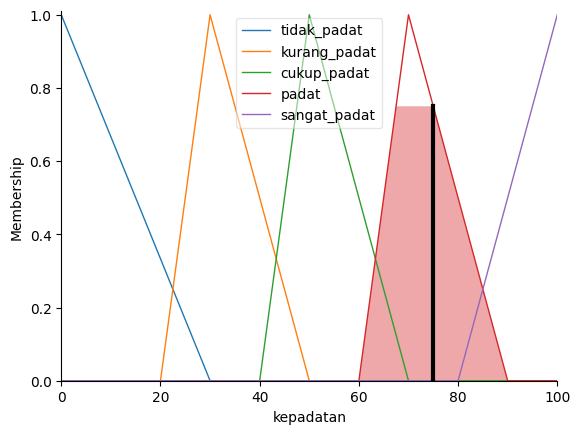

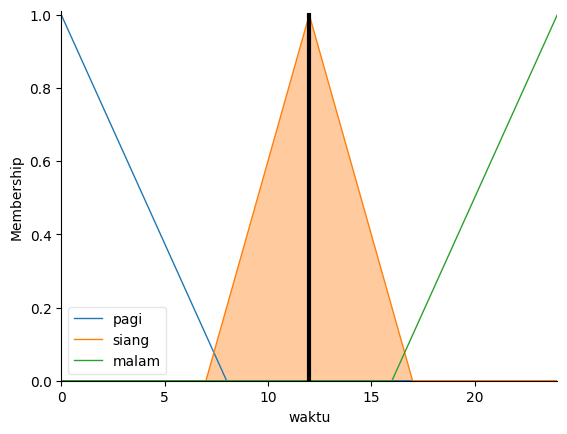

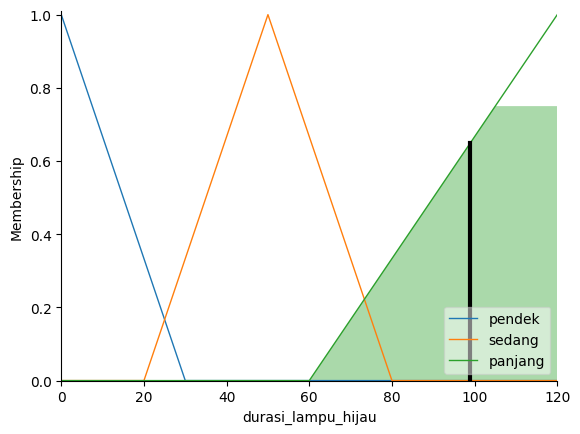

In [40]:
rand_kepadatan = np.random.randint(0,101)
rand_waktu = (np.random.randint(0,25))

simulasi_lampu.input['kepadatan'] = rand_kepadatan

simulasi_lampu.input['waktu'] = rand_waktu


simulasi_lampu.compute()


# Output
print(f"Input  = Kepadatan: {rand_kepadatan}, Waktu: {rand_waktu}")
print(f"Output = Durasi Lampu Hijau: {simulasi_lampu.output['durasi_lampu_hijau']:.0f} detik")

kepadatan.view(sim=simulasi_lampu)
waktu.view(sim=simulasi_lampu)
durasi_lampu_hijau.view(sim=simulasi_lampu)